# **9. Data Visualization (with Pandas)**

## **7. Pie Chart**

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## ✅ 1. What It Does and When to Use

### 🔹 What:

A **Pie Chart** is a circular statistical graphic that shows **proportional data**. Each slice represents a **category’s contribution** to the whole, expressed in percentages.

In pandas, a pie chart can be generated using the `.plot(kind='pie')` method on a Series or a DataFrame column.

### 🔹 When to Use:

* When you want to show **relative proportions** of categories at a **specific point in time** (not over time).
* When you're analyzing **snapshot summaries** rather than trends.
* Ideal for **categorical data** like types of events, product sales breakdown, etc., at a particular date or interval.

> ⚠️ Pie charts are **not ideal for time series trends** — instead, use them to summarize time series data (e.g., total distribution over months).

## ✅ 2. Syntax and Core Parameters

```python
# On a pandas Series
series.plot(kind='pie', **kwargs)

# On a DataFrame column
df['column_name'].plot(kind='pie', **kwargs)
```

### 📌 Core Parameters:

| Parameter    | Description                                                        |
| ------------ | ------------------------------------------------------------------ |
| `kind='pie'` | Specifies the chart type as a pie chart                            |
| `labels`     | List of labels for slices (optional; pandas index used by default) |
| `autopct`    | String or function to display % on slices (e.g., `'%1.1f%%'`)      |
| `startangle` | Starting angle of the pie chart (default is 0)                     |
| `shadow`     | Whether to draw a shadow (boolean)                                 |
| `explode`    | Array to "pull out" slices for emphasis                            |
| `legend`     | Whether to show the legend (`True` or `False`)                     |
| `colors`     | List of colors for the slices                                      |
| `figsize`    | Figure size of the chart                                           |


## ✅ 3. Techniques and Variations

### 🔸 Pie Chart from a Series

The most common usage — plot categorical proportions.

### 🔸 Pie Chart from Aggregated Time Series

Group by month/day and then plot as a pie chart.

### 🔸 Exploding a Slice

Use `explode` to emphasize a category.

### 🔸 Customizing Percent Labels

Use `autopct` to show percentages inside slices.

### 🔸 Starting at a Specific Angle

Use `startangle` for better orientation and layout.


## ✅ 4. Examples with Data

### 📊 Example Dataset – Monthly Expenses

In [4]:
data = {
    'Category': ['Rent', 'Food', 'Utilities', 'Transport', 'Misc'],
    'Amount': [1200, 600, 200, 150, 100]
}

df = pd.DataFrame(data).set_index('Category')
df

,Amount
Category,
Rent,1200
Food,600
Utilities,200
Transport,150
Misc,100


### 🔹 1. Basic Pie Chart

<Axes: ylabel='Amount'>

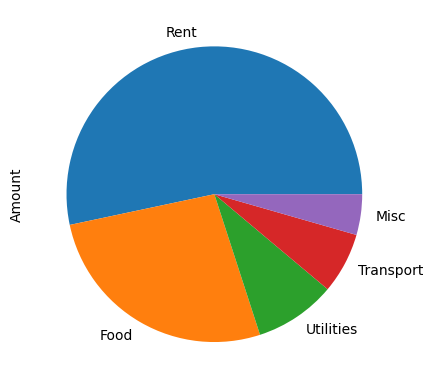

In [5]:
df['Amount'].plot(kind='pie')

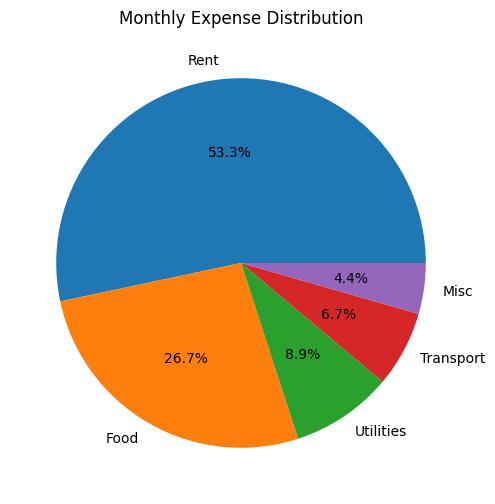

In [10]:
df['Amount'].plot(kind='pie', autopct='%1.1f%%',title='Monthly Expense Distribution', figsize=(6,6))
plt.ylabel('')  # Hides y-label
plt.show()

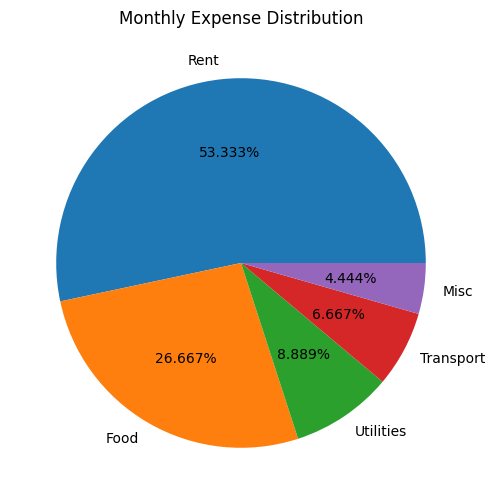

In [11]:
df['Amount'].plot(kind='pie', autopct='%1.3f%%',title='Monthly Expense Distribution', figsize=(6,6))
plt.ylabel('')  # Hides y-label
plt.show()

### 🔹 2. Exploded Slice for Emphasis

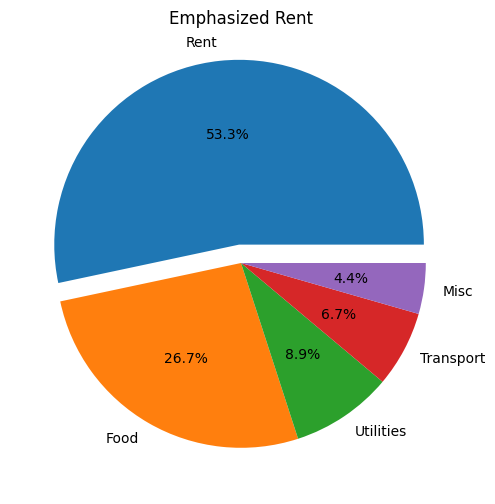

In [12]:
explode = [0.1, 0, 0, 0, 0]  # Emphasize 'Rent'
df['Amount'].plot(kind='pie', autopct='%1.1f%%', explode=explode, title='Emphasized Rent', figsize=(6,6))
plt.ylabel('')
plt.show()

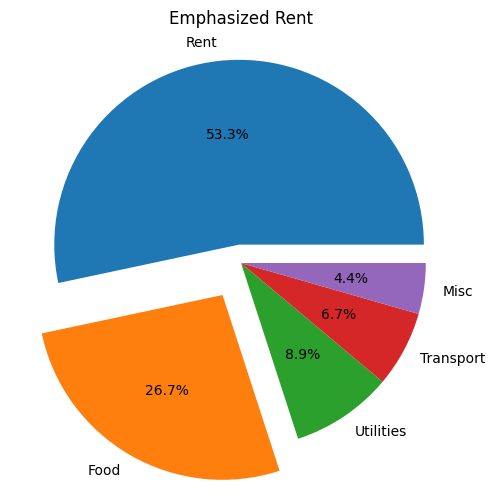

In [13]:
explode = [0.1, 0.2, 0, 0, 0]  # Emphasize 'Rent'
df['Amount'].plot(kind='pie', autopct='%1.1f%%', explode=explode, title='Emphasized Rent', figsize=(6,6))
plt.ylabel('')
plt.show()

### 🔹 3. Start Angle & Custom Colors

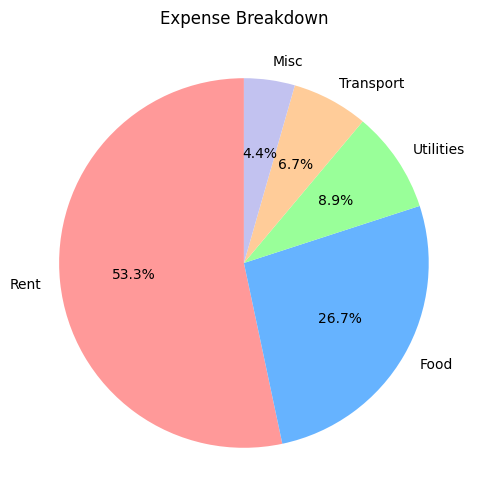

In [14]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, title='Expense Breakdown', figsize=(6,6))
plt.ylabel('')
plt.show()

### 🔹 4. Pie Chart from Aggregated Time Series

In [15]:
# Simulated daily transactions
df_time = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Category': ['Food', 'Rent', 'Utilities', 'Food', 'Transport', 'Rent', 'Misc', 'Food', 'Utilities', 'Rent'],
    'Amount': [20, 1200, 150, 30, 50, 1200, 60, 25, 100, 1200]
})

df

,Amount
Category,
Rent,1200
Food,600
Utilities,200
Transport,150
Misc,100


In [16]:
# Group by Category
grouped = df_time.groupby('Category')['Amount'].sum()

grouped

Category
Food           75
Misc           60
Rent         3600
Transport      50
Utilities     250
Name: Amount, dtype: int64

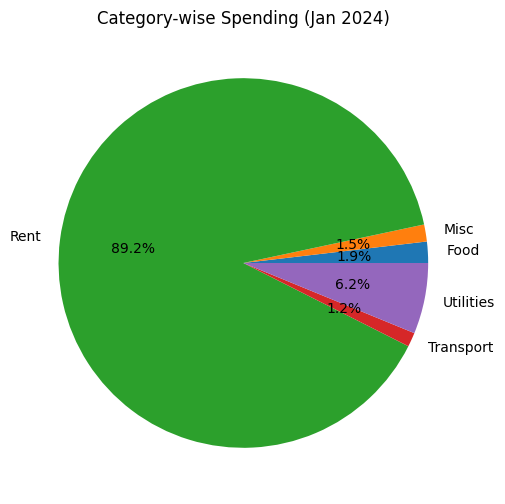

In [17]:
# Plot
grouped.plot(kind='pie', autopct='%1.1f%%', title='Category-wise Spending (Jan 2024)', figsize=(6,6))
plt.ylabel('')
plt.show()

## ✅ 5. Common Pitfalls

| Pitfall                   | Explanation                                                                                                               |
| ------------------------- | ------------------------------------------------------------------------------------------------------------------------- |
| **Too many categories**   | Hard to read pie charts with more than 5-6 categories                                                                     |
| **Not suited for trends** | Pie charts can't show time evolution — avoid using them for time-based comparisons                                        |
| **Missing percentages**   | Not setting `autopct` leads to poor readability                                                                           |
| **Inconsistent colors**   | Using default colors without setting a theme may cause confusion                                                          |
| **Wrong index**           | Pie chart must be based on a Series with categorical index — avoid applying on full DataFrames without selecting a column |


## ✅ 6. Real-World Examples and Use Cases

### 💰 Finance:

* Show **monthly expense breakdown** by category
* Visualize **investment allocation** in a portfolio

### 🛒 Business:

* Display **market share** of products during a quarter
* Break down **sales by region** at a point in time

### 📈 Time-Series Aggregation Example:

* Aggregate **website visits by source** (e.g., Direct, Search, Referral) over a month and plot distribution

### 🏥 Healthcare:

* Visualize proportion of **patients by diagnosis** type for a specific month

### 🧑‍💼 HR Analytics:

* Show **employee distribution** across departments or teams as a snapshot


## ✅ Summary

| Feature           | Description                                                  |
| ----------------- | ------------------------------------------------------------ |
| **Purpose**       | Visualize categorical proportions at a given time            |
| **Input**         | Series or column of a DataFrame                              |
| **Best Use Case** | Breakdown of a single time slice of data                     |
| **Customization** | Labels, percentage display, explode, start angle, and colors |
| **Avoid For**     | Time-based trend analysis                                    |


<center><b>Thanks</b></center>